In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

data = pd.read_csv('train\\random\\random.csv')[['Pic', 'NumCircles']]
img_list = []
for i in range(1000):
    temp = cv2.imread("train\\random\\" + '{:05}'.format(i) + '.png')
    img_list.append(cv2.resize(temp,(480, 480)))
    

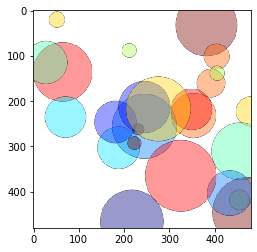

In [2]:
plt.imshow(img_list[1])
plt.show()

# cv2.imshow("Image", img_list[1])
# cv2.waitKey()
# cv2.destroyAllWindows()

In [60]:
a = np.array(img_list[1])
r = a[:,:,0]
g = a[:,:,1]
b = a[:,:,2]
gr = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)


k_size = 3
kernel = np.ones((k_size,k_size),np.uint8)
gr = cv2.dilate(gr, kernel,iterations = 1)
gr = cv2.erode(gr, kernel,iterations = 1)

#ret, gr = cv2.threshold(gr, 150, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(gr,cv2.HOUGH_GRADIENT, 1, 20, param1=45,param2=30,minRadius=6,maxRadius=85)
print(len_circles(circles), data['NumCircles'][i])

cv2.imshow("A", a)
cv2.imshow("R", r)
cv2.imshow("G", g)
cv2.imshow("B", b)
cv2.imshow("GR", gr)
cv2.waitKey()
cv2.destroyAllWindows()

19 209.500000   NaN
234.500000   NaN
18.799999    NaN
Name: NumCircles, dtype: float64


49 52


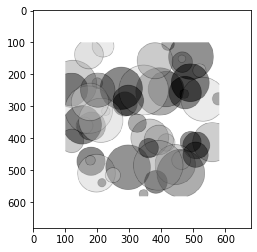

In [89]:
def len_circles(circles):
    if circles is None:
        return 0
    else:
        return len(circles[0])

def count_num(img, trs=250):
    k_size = 2    
    g_size = 5
    bordersize = 100
    
    img=cv2.copyMakeBorder(img, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                              borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
        
    img = cv2.GaussianBlur(img, (g_size,g_size),0)
    
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #ret, img_threshold = cv2.threshold(img_grey, trs, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((k_size,k_size),np.uint8)
    img_grey = cv2.erode(img_grey, kernel,iterations = 1)
    img_grey = cv2.dilate(img_grey, kernel,iterations = 1)

    circles = cv2.HoughCircles(img_grey,cv2.HOUGH_GRADIENT, 1, 20, param1=40,param2=40,minRadius=6,maxRadius=85)
    #circles = cv2.HoughCircles(img_threshold,cv2.HOUGH_GRADIENT, 1, 20, param1=50,param2=30,minRadius=0,maxRadius=0)
    
    return img_grey, len_circles(circles), circles

test_idx = 2

g, n, circles = count_num(img_list[test_idx])
print(n, data['NumCircles'][test_idx])
#print(circles)

cimg = img_list[test_idx].copy()
bordersize = 100
cimg = cv2.copyMakeBorder(cimg, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                              borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg, (int(i[0]) ,int(i[1])), int(i[2]), (0,255,0), 2)
    # draw the center of the circle
    cv2.circle(cimg,(int(i[0]), int(i[1])), 2, (0,0,255) ,3)
cv2.imshow("Orig", img_list[test_idx])
cv2.imshow("Find", cimg)
cv2.imshow("Grey", g)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(g,cmap='gray')
plt.show()

In [90]:
n_pred_list = []
err_list = []
for i, img_i in enumerate(img_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    if n_pred_i > 70:
        n_pred_i = 70;
    n_pred_list.append(n_pred_i)
    n_true_i = data['NumCircles'][i]
    err_i = (float(n_true_i) - float(n_pred_i))/float(n_true_i)
    err_list.append(err_i)
    #print(n_true_i, n_pred_i, )
    
n_true = data['NumCircles'].to_numpy()
n_pred = np.array(n_pred_list)
err = np.array(err_list)

print(np.mean(err))
print('========')
print(n_pred - n_true)

0.05567965581478432
[ -2  -2  -3  -4  -1  -2  -5  -5  -5  -1  -2  -5  -2  -1   0  -7  -2   1
  -1  -3  -5  -4   3   0   1  -3   0  -1  -5  -2  -2   0   3   5   0  -2
  -8  -4  -5  -3  -1  -3  -3  -1  -4  -1  -4   0  -4  -2  -1   6 -16   1
  -5  -1  -2   0   0  -1  -4  -3  -3  -1  -1  -1  -5   0  -3  -8  -4   0
  -4  -7  -2  -2   0  -9  -1  -1  -3  -1  -5   1  -8  -1  -5   1  -1  -4
   1  -1   1  -5  -2  -5  -6  -8  -5  -6  -8  -3   1  -2   0  -1   0  -1
  -1   0  -1   0   0  -2  -2  -4  -1   0  -3  -1   3  -3  -1  -3  -1  -1
  -3   0  -2  -3   0  -3  -1  -1  -2  -1  -3  -2  -6  -2 -12 -13  -1   0
  -3  -7  -1  -6  -2  -7   0  -1  -1   1  -5  -3  -1  -6  -6  -2  -5  -2
   0  -1  -1  -2  -7  -5  -2  -6  -3  -1  -4   0  -1  -5  -6  -2  -6  -1
  -5  -5  -2  -5  -1  -1  -1  -1  -3  -5   0  -7  -1  -3  -2  -9  -5  -3
  -2  -4  -1  -1  -3  -4  -4  -1  -1  -2  -2  -3   0  -1  -6  -3  -6  -7
  -7  -4  -3  -2  -5  -4  -3  -1  -2  -6  -3   0  -6  -8  -5  -1  -2  -2
  -3  -3  -8  -2  -1  -6  -5  -

In [91]:
# Эта их прекрасная метрика
contribs = (1 - np.abs(n_true-n_pred)/10.)
contribs[contribs < 0] = 0
contribs.sum()

717.7

In [92]:
# Теперь считаем sub
img_sub_list = []
for i in range(500):
    temp = cv2.imread("test\\random\\" + '{:05}'.format(i) + '.png')
    img_sub_list.append(cv2.resize(temp,(480, 480)))
    
n_pred_sub_list = []
for i, img_i in enumerate(img_sub_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    n_pred_sub_list.append(n_pred_i)
    
n_pred_sub = np.array(n_pred_sub_list)
n_pred_sub

out_df = pd.DataFrame({'id' : range(500), 'num' : n_pred_sub})
out_df.to_csv('random.csv', index=False, header=False, sep=' ')